# Exercise 2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [118]:
#load matrix into dataframe
df_rpkms = pd.read_csv("/Users/cmdb/qbb2020-answers/day2-homework/matrix_1kg.txt",
                       sep = '\t')
df_rpkms

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,chr21,14347281,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,chr21,14003813,T,C,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,chr21,39261634,T,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chr21,17793478,A,G,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,chr21,35934376,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,chr21,28142462,A,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,chr21,17061272,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,chr21,43768467,C,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,chr21,36334991,G,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#exclude non-genotype columns 
df_alleles =df_rpkms.iloc[:, 4:] 
df_alleles

,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#sum to find total alternate alleles per sample
df_sum = df_alleles.sum(axis=1)
df_sum

0         2
1        98
2        17
3        11
4         2
       ... 
9995    105
9996      1
9997      7
9998    147
9999     13
Length: 10000, dtype: int64

In [54]:
#divide by total chromosomes to find frequency
df_freq = df_sum/(2*2548)
df_freq

0       0.000392
1       0.019231
2       0.003336
3       0.002159
4       0.000392
          ...   
9995    0.020604
9996    0.000196
9997    0.001374
9998    0.028846
9999    0.002551
Length: 10000, dtype: float64

Text(0, 0.5, '#SNPs')

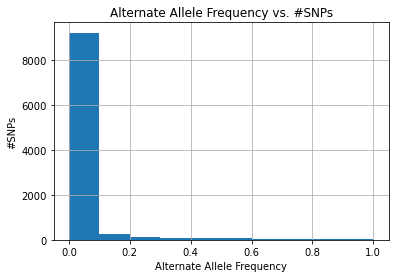

In [57]:
df_freq.hist()
plt.title("Alternate Allele Frequency vs. #SNPs")
plt.xlabel("Alternate Allele Frequency")
plt.ylabel("#SNPs")

# Exercise 3

In [99]:
#limit values within the range
df_subset = df_freq.between(0.05, 0.95, inclusive = False) 

df_subset



0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [108]:
#make new subset of common variations using boolean to exclude values outside range
df_common = df_freq.loc[df_subset] 

df_common


20      0.080259
32      0.595761
38      0.405612
41      0.094388
46      0.097527
          ...   
9957    0.841837
9959    0.115973
9974    0.180730
9975    0.810047
9980    0.077708
Length: 986, dtype: float64

Text(0, 0.5, '#SNPs')

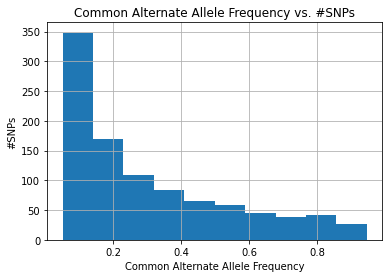

In [110]:
df_common.hist()
plt.title("Common Alternate Allele Frequency vs. #SNPs")
plt.xlabel("Common Alternate Allele Frequency")
plt.ylabel("#SNPs")

# Exercise 4

In [111]:
pca_input = df_alleles.iloc[:, 2:]
pca_input

,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,HG00107,HG00108,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
pca_input = pca_input.T #transpose pca_input to scale along rows
pca_input

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
HG00099,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HG00100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HG00101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HG00102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HG00103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NA21137,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NA21141,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NA21142,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NA21143,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
pca_input_standardized = StandardScaler().fit_transform(pca_input)
pca_input_standardized.mean(axis=0) #check means are close to zero

array([ 3.54038937e-16,  8.79086452e-16,  3.21674694e-16, ...,
        9.70245966e-16, -2.17045113e-15, -7.48833656e-17])

In [115]:
pca_input_standardized.var(axis = 0) #check if variance is 1

array([1., 1., 1., ..., 1., 1., 1.])

In [114]:
pca = PCA(n_components = 10) #initialize 10 principle components
pca_output = pca.fit_transform(pca_input_standardized)
pca_output

array([[ -8.29484725,  -9.0363675 ,  -2.85409755, ...,   0.340577  ,
         -0.38581945,   0.33773978],
       [ -7.92255499,  -9.08644764,  -5.27700902, ...,  -0.75647722,
         -0.17697496,   0.94006686],
       [ -8.8865154 , -10.12167834,  -5.29869464, ...,   0.30152468,
         -0.41053418,   0.08117744],
       ...,
       [ -6.33687896,  -3.79263055,   7.00941315, ...,  -0.08887311,
          0.74702794,   0.07900261],
       [ -8.62041998,  -2.76535165,   8.74566735, ...,   0.87456438,
         -0.09689253,  -0.82385311],
       [ -6.08541968,  -1.8047359 ,   9.20064268, ...,   0.82661195,
          0.11492686,   0.14066486]])

In [116]:
#make dataframe out of pca_output
pca_output_df = pd.DataFrame(data = pca_output,
                            columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
pca_output_df


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-8.294847,-9.036367,-2.854098,-0.817163,-4.290404,0.324414,0.382444,0.340577,-0.385819,0.337740
1,-7.922555,-9.086448,-5.277009,-0.302403,-2.898052,-0.618755,0.055718,-0.756477,-0.176975,0.940067
2,-8.886515,-10.121678,-5.298695,0.348796,-0.865932,0.419786,-0.022247,0.301525,-0.410534,0.081177
3,-6.974386,-7.928381,-3.014419,0.742575,-1.305128,0.159506,0.082441,0.011416,-0.137336,-0.531243
4,-7.857379,-9.690119,-4.768558,0.154541,-3.982568,-0.022124,0.014690,0.004418,-0.200958,-0.743351
...,...,...,...,...,...,...,...,...,...,...
2541,-8.051553,-0.497191,8.881207,0.660391,3.256775,-0.437030,-1.351729,-0.110363,1.102541,0.113373
2542,-8.441913,-3.964350,11.088892,0.341159,1.492648,-0.199358,1.558400,-1.146160,-0.030399,0.890602
2543,-6.336879,-3.792631,7.009413,0.938475,1.204793,-0.985114,-0.336875,-0.088873,0.747028,0.079003
2544,-8.620420,-2.765352,8.745667,0.022257,1.658676,0.026209,-0.325752,0.874564,-0.096893,-0.823853


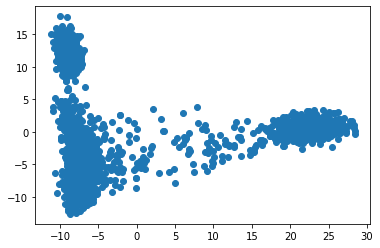

In [117]:
fig, ax = plt.subplots()
ax.scatter(x = pca_output_df['PC1'], y = pca_output_df['PC2'])